In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

clinical_df = pd.read_csv('clinical.tsv', sep='\t')

In [3]:
def OS(col, lab):
    a = col.replace("'--", np.NaN).dropna().apply(pd.to_numeric).sort_values()
    b = pd.Series(1 - (np.arange(len(a)) + 1) / len(col))
    b.index = a
    b = b[~b.index.duplicated(keep='last')].reindex(list(range(b.index.min(),b.index.max()+1))).fillna(method='ffill')
    plt.plot(b, label=lab)

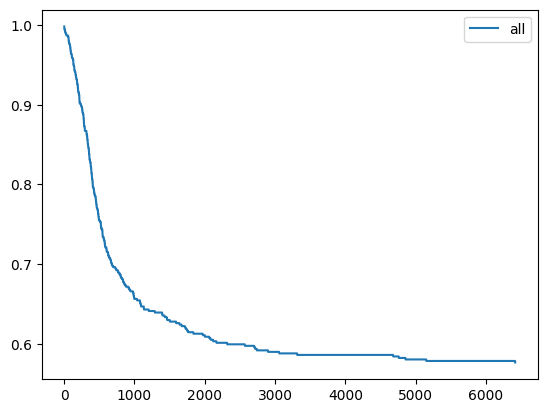

In [4]:
OS(clinical_df['days_to_death'], 'all')
plt.legend()
plt.show()

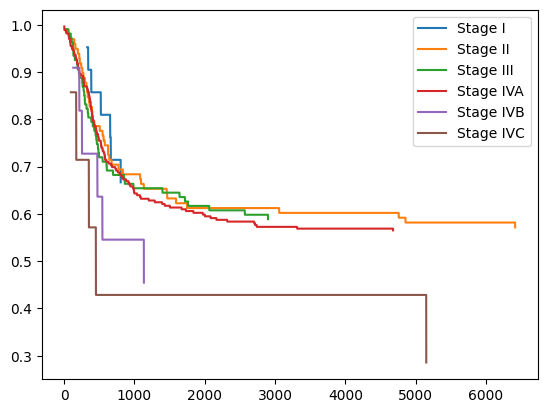

In [5]:
OS(clinical_df[clinical_df['ajcc_clinical_stage'] == 'Stage I']['days_to_death'], 'Stage I')
OS(clinical_df[clinical_df['ajcc_clinical_stage'] == 'Stage II']['days_to_death'], 'Stage II')
OS(clinical_df[clinical_df['ajcc_clinical_stage'] == 'Stage III']['days_to_death'], 'Stage III')
OS(clinical_df[clinical_df['ajcc_clinical_stage'] == 'Stage IVA']['days_to_death'], 'Stage IVA')
OS(clinical_df[clinical_df['ajcc_clinical_stage'] == 'Stage IVB']['days_to_death'], 'Stage IVB')
OS(clinical_df[clinical_df['ajcc_clinical_stage'] == 'Stage IVC']['days_to_death'], 'Stage IVC')
plt.legend()
plt.show()

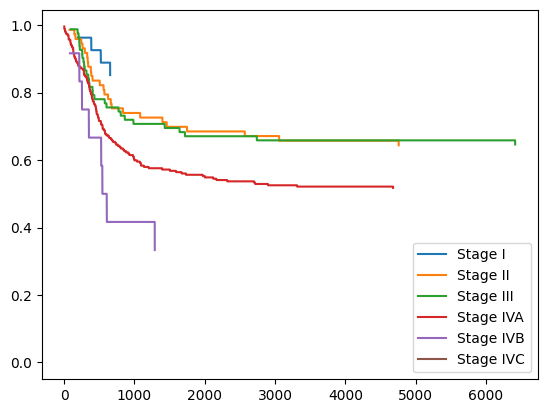

In [7]:
OS(clinical_df[clinical_df['ajcc_pathologic_stage'] == 'Stage I']['days_to_death'], 'Stage I')
OS(clinical_df[clinical_df['ajcc_pathologic_stage'] == 'Stage II']['days_to_death'], 'Stage II')
OS(clinical_df[clinical_df['ajcc_pathologic_stage'] == 'Stage III']['days_to_death'], 'Stage III')
OS(clinical_df[clinical_df['ajcc_pathologic_stage'] == 'Stage IVA']['days_to_death'], 'Stage IVA')
OS(clinical_df[clinical_df['ajcc_pathologic_stage'] == 'Stage IVB']['days_to_death'], 'Stage IVB')
OS(clinical_df[clinical_df['ajcc_pathologic_stage'] == 'Stage IVC']['days_to_death'], 'Stage IVC')
plt.legend()
plt.show()

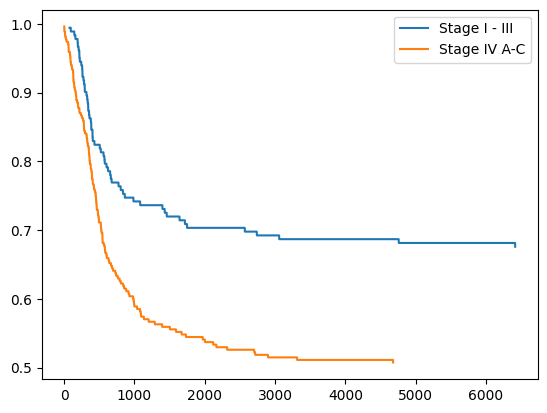

In [6]:
#Stage I       27
#Stage II      73
#Stage III     82
#182
#Stage IVA    257
#Stage IVB     12
#Stage IVC      1
#270

OS(clinical_df[clinical_df['ajcc_pathologic_stage'].isin(['Stage I', 'Stage II', 'Stage III'])]['days_to_death'], 'Stage I - III')
OS(clinical_df[clinical_df['ajcc_pathologic_stage'].isin(['Stage IVA', 'Stage IVB', 'Stage IVC'])]['days_to_death'], 'Stage IV A-C')
plt.legend()
plt.show()